In [40]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
#Ignore Warning
import warnings
warnings.filterwarnings("ignore") 
# set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [42]:
#Run SetUp Script to Install Packages 
#General purpose imports here
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import re # regular expressions
import scipy
import sys
import os # Operation System
import seaborn as sns  # pretty plotting, including heat map
from timeit import default_timer as timer
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
import sklearn
import tensorflow as tf
from datetime import datetime
from __future__ import division, print_function, unicode_literals
#These below are used in image processing
import cv2
import zipfile
from PIL import Image
from skimage.transform import resize, rotate, SimilarityTransform, warp
from skimage.filters import sobel
import glob

#Keras/tensorflow convolutional neural network specific imports here
import tensorflow as tf
from tensorflow import keras

#Below used for TensorBoard data Visualization
#from time import time
#from keras.callbacks import TensorBoard
# Python ≥3.5 is required
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [43]:
#Establish working directory
#os.getcwd()
#Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Assignment6 /
!pwd
#!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/Assignment6 /"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Assignment6 
/content/gdrive/My Drive/Assignment6 
Working Directory
/content/gdrive/My Drive/Assignment6 


In [44]:
df_train = pd.read_csv(work_dir + "./data/train.csv")

#Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#and the data types for each variable
df_train.info()

# Use the head() method to inspect the first five (or more) rows of the data
df_train.head()

# shape of leaf train Dataset
print('Shape of Leaf train dataset',df_train.shape)

# Summary Statistics of leaf Dataset
df_train.describe().transpose()

df_train.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


Shape of Leaf train dataset (990, 194)


,count,mean,std,min,25%,50%,75%,max
id,990.0,799.595960,452.477568,1.0,415.250000,802.500000,1195.500000,1584.000000
margin1,990.0,0.017412,0.019739,0.0,0.001953,0.009766,0.025391,0.087891
margin2,990.0,0.028539,0.038855,0.0,0.001953,0.011719,0.041016,0.205080
margin3,990.0,0.031988,0.025847,0.0,0.013672,0.025391,0.044922,0.156250
margin4,990.0,0.023280,0.028411,0.0,0.005859,0.013672,0.029297,0.169920
...,...,...,...,...,...,...,...,...
texture60,990.0,0.014017,0.060151,0.0,0.000000,0.000000,0.000000,0.578130
texture61,990.0,0.002688,0.011415,0.0,0.000000,0.000000,0.000000,0.151370
texture62,990.0,0.020291,0.039040,0.0,0.000000,0.003906,0.023438,0.375980
texture63,990.0,0.008989,0.013791,0.0,0.000000,0.002930,0.012695,0.086914


Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [45]:
df_test = pd.read_csv(work_dir + "./data/test.csv")

#Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#and the data types for each variable
df_test.info()

# Use the head() method to inspect the first five (or more) rows of the data
df_test.head()

# shape of leaf test Dataset
print('Shape of Leaf test dataset',df_test.shape)

# Summary Statistics of leaf Dataset
df_test.describe().transpose()

df_test.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


Shape of Leaf test dataset (594, 193)


,count,mean,std,min,25%,50%,75%,max
id,594.0,780.673401,465.646977,4.0,368.500000,774.000000,1184.500000,1583.000000
margin1,594.0,0.017562,0.019585,0.0,0.001953,0.009766,0.028809,0.085938
margin2,594.0,0.028425,0.038351,0.0,0.001953,0.010743,0.041016,0.189450
margin3,594.0,0.031858,0.025719,0.0,0.013672,0.023438,0.042969,0.167970
margin4,594.0,0.022556,0.028797,0.0,0.005859,0.013672,0.027344,0.164060
...,...,...,...,...,...,...,...,...
texture60,594.0,0.011217,0.052530,0.0,0.000000,0.000000,0.000000,0.606450
texture61,594.0,0.002617,0.011204,0.0,0.000000,0.000000,0.000000,0.123050
texture62,594.0,0.019975,0.034704,0.0,0.000000,0.003418,0.022461,0.247070
texture63,594.0,0.009389,0.013457,0.0,0.000000,0.002930,0.014648,0.086914


Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)

The dataset is composed of a combination of 990 observations and 194 features in train dataset and 594 observations and 193 features in test dataset . All of the features are continous (float64) and ID is numerical(int64).The species feature is only present in train dataset. There are no missing values (Nan) but we can validate it again with null check.

In [46]:
# Checking for Missing values in train dataset
print('Missing value in Leaf train data: ',df_train.isnull().sum().sum())

# Checking for duplicates in train dataset
print('Duplicates in Leaf train data: ',df_train.duplicated().sum())

Missing value in Leaf train data:  0
Duplicates in Leaf train data:  0


In [47]:
# Checking for Missing values in test dataset
print('Missing value in Leaf test data: ',df_test.isnull().sum().sum())

# Checking for duplicates in test dataset
print('Duplicates in Leaf test data: ',df_test.duplicated().sum())

Missing value in Leaf test data:  0
Duplicates in Leaf test data:  0


In [48]:
# Inspect class balances for train set.
print(df_train['species'].value_counts(ascending=False))
print(df_train['species'].value_counts(normalize=True))

Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64
Acer_Opalus                    0.010101
Crataegus_Monogyna             0.010101
Acer_Mono                      0.010101
Magnolia_Heptapeta             0.010101
Acer_Capillipes                0.010101
                                 ...   
Alnus_Rubra                    0.010101
Rhododendron_x_Russellianum    0.010101
Cytisus_Battandieri            0.010101
Liriodendron_Tulipifera        0.010101
Sorbus_Aria                    0.010101
Name: species, Length: 99, dtype: float64


([<matplotlib.patches.Wedge at 0x7f28f245a810>,
 [Text(-0.034900726815381526, 1.099446196622535, ''),
  Text(-0.10456164753751467, 1.0950191148396637, ''),
  Text(-0.17380153541018017, 1.0861827775697164, ''),
  Text(-0.2423415858432209, 1.0729727656240828, ''),
  Text(-0.3099058122448406, 1.0554422710583775, ''),
  Text(-0.37622215732219927, 1.0336618829868065, ''),
  Text(-0.4410235885601086, 1.0077193033447183, ''),
  Text(-0.5040491734667203, 0.9777189937438652, ''),
  Text(-0.5650451302565758, 0.9437817548423626, ''),
  Text(-0.623765849740282, 0.9060442399230758, ''),
  Text(-0.6799748843060313, 0.8646584046390804, ''),
  Text(-0.7334459000106762, 0.8197908951418827, ''),
  Text(-0.7839635879466379, 0.7716223770561831, ''),
  Text(-0.8313245312148794, 0.7203468080031737, ''),
  Text(-0.875338024012965, 0.6661706566016533, ''),
  Text(-0.9158268395400145, 0.6093120710917752, ''),
  Text(-0.9526279436264792, 0.5500000009290781, ''),
  Text(-0.9855931512151993, 0.48847327488583586, 

Text(0.5, 1.0, 'Leaf Species Distribution')

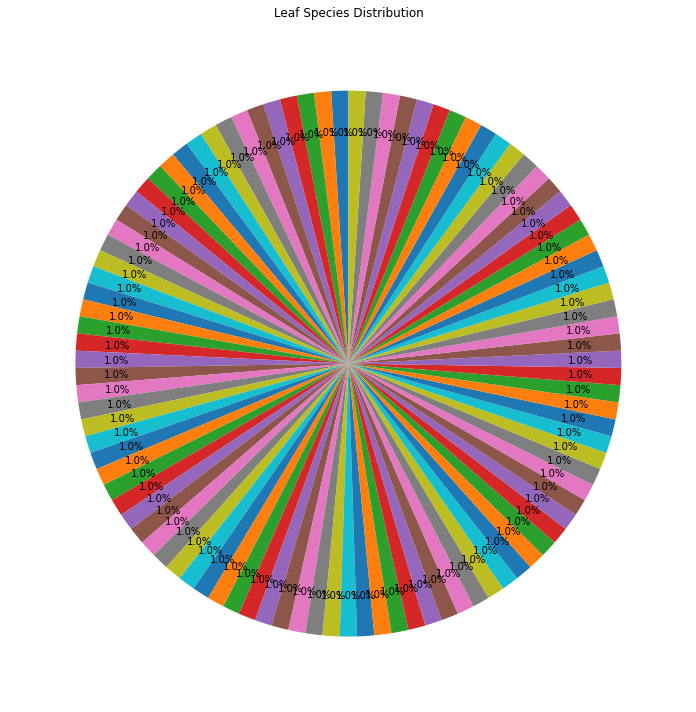

In [49]:
values = df_train['species'].value_counts().sort_values(ascending = True)
colors = sns.color_palette()

#create pie chart to see the distribution of label variable of interest
plt.pie(values, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

#draw circle
#centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
fig.set_size_inches(10,10)
# Equal aspect ratio ensures that pie is drawn as a circle 
plt.title("Leaf Species Distribution") 
plt.tight_layout()
plt.show()

The distribution is balanced among all 99 species.

<Figure size 1440x1080 with 0 Axes>

102.jpg


139.jpg


1447.jpg


1102.jpg


1133.jpg


1367.jpg


116.jpg


1434.jpg


1390.jpg


1069.jpg


1051.jpg


1228.jpg


1193.jpg


1452.jpg


1421.jpg


1290.jpg


1466.jpg


1457.jpg


121.jpg


1084.jpg


1181.jpg


1131.jpg


1378.jpg


1302.jpg


1184.jpg


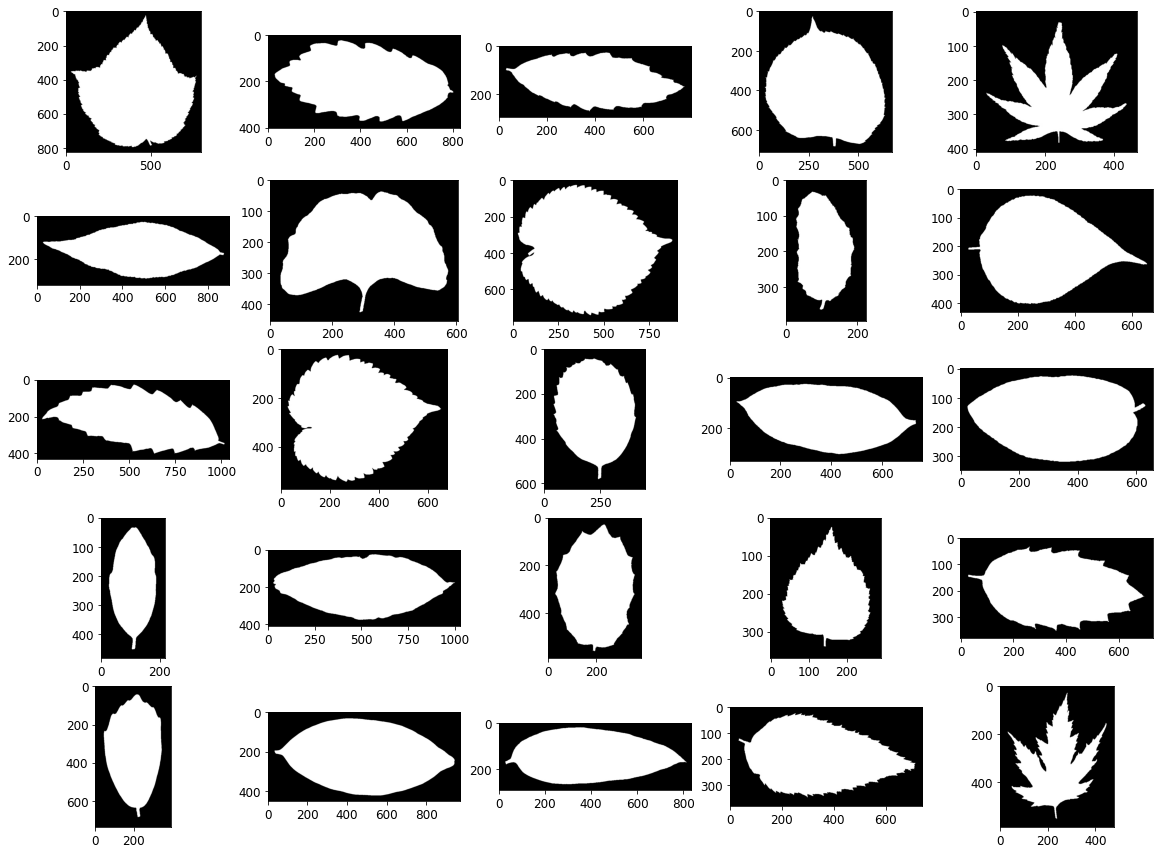

In [50]:
#visualize the images in image folder to see different orientation.
plt.figure(figsize=(20,15))
for i in range(25):
    j=np.random.choice((os.listdir(work_dir +'./data/images')))
    print(j)
    plt.subplot(5,5,i+1)
    img=keras.preprocessing.image.load_img(os.path.join(work_dir +'./data/images',j))
    plt.imshow(img)

######   Based on the images, we may need image augmentation such as horizontal and vertical flip and rotation to drive accuracy.

In [51]:
img_rows, img_cols = 64, 64 #96,96 #40, 40 (we will go with 64 width and height as each feature is a 64-attribute vector per leaf sample.

train_images = np.zeros((df_train.shape[0], img_rows, img_cols))
for i in range(df_train.shape[0]):
    image = cv2.imread(work_dir +'./data/images/' + str(df_train.id.iloc[i])+'.jpg', cv2.IMREAD_GRAYSCALE)
    if image is None:
        continue
    rimage = cv2.resize(image, (img_rows, img_cols))
    rimage = rimage/255.0 #Pixel value regularization done here
    #train_images[i] = rimage
    train_images[i] = sobel(rimage) # Sobel filter on an image to detect edges
       
test_images = np.zeros((df_test.shape[0], img_rows, img_cols))
for i in range(df_test.shape[0]):
    image = cv2.imread(work_dir +'./data/images/' + str(df_test.id.iloc[i])+'.jpg',cv2.IMREAD_GRAYSCALE)
    if image is None:
        continue
    rimage = cv2.resize(image, (img_rows, img_cols))
    rimage = rimage/255.0
    test_images[i] = sobel(rimage) #Sobel filter on an image to detect edges

print('Train images shape: {}'.format(train_images.shape)) # 990
print('Test images shape: {}'.format(test_images.shape)) # 594

Train images shape: (990, 64, 64)
Test images shape: (594, 64, 64)


In [52]:
train_Id = df_train['id']
df_train_new = df_train.drop('id',1)
target =  df_train_new["species"]
df_train_new = df_train_new.drop('species',1)
df_train_new.shape

(990, 192)

In [53]:

target.shape
target.head()

(990,)

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
4       Quercus_Variabilis
Name: species, dtype: object

In [54]:
# Since the labels are textual, so we encode them categorically
le = LabelEncoder()
encoded_target= le.fit_transform(target)
feature_train = StandardScaler().fit(df_train_new).transform(df_train_new)

In [55]:
encoded_target
feature_train

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ...,
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

In [56]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

def dist_plot(var1, var2, var3):
    plt.figure(figsize=(10,10))
    tmp_plt=sns.countplot(var1, palette="Blues").set_title(var2)
    tmp_fig = tmp_plt.get_figure()
    tmp_fig.savefig(var3 + ".png", 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.5)
    return(tmp_plt)
    
#Tensorboard Logs
root_logdir = os.path.join(os.curdir, "tf_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

### <font color=CornflowerBlue>Train and test split<font>

In [57]:
# Split the train and the validation set for the fitting 
X_train, X_val, y_train, y_val = train_test_split(train_images, encoded_target, test_size = 0.3, shuffle=True, stratify=encoded_target, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((693, 64, 64), (297, 64, 64), (693,), (297,))

In [58]:
# stratified randomized folds for cross validation.
sss = StratifiedShuffleSplit(10, test_size=0.2, random_state=42)
train_i,val_i = next(sss.split(feature_train,encoded_target))

features_val,val_img,val_target = feature_train[val_i],train_images[val_i], encoded_target[val_i]
features_train,train_img,train_target = feature_train[train_i],train_images[train_i],encoded_target[train_i]

In [59]:
# # reshape dataset to have a single channel
train_img = train_img.reshape(train_img.shape[0], img_rows, img_cols, 1) # 792
val_img = val_img.reshape(val_img.shape[0], img_rows, img_cols, 1) # 198
features_train = features_train.reshape(features_train.shape[0],features_train.shape[1],1)
features_val = features_val.reshape(features_val.shape[0],features_val.shape[1],1)
#X_test = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
#print(X_train.shape, X_val.shape, X_test.shape)

In [60]:
# # reshape dataset to have a single channel
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) # 792
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1) # 198
X_test = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(X_train.shape, X_val.shape, X_test.shape)

(693, 64, 64, 1) (297, 64, 64, 1) (594, 64, 64, 1)


In [61]:
nb_classes = np.unique(df_train.species).size
nb_classes

99

In [62]:
# one hot encode target values (convert class vectors to binary class matrices), num_classes will take max(y) + 1 i.e. 10 digits
nb_classes = np.unique(y_train).size
y_train = keras.utils.to_categorical(y_train, nb_classes)
y_val = keras.utils.to_categorical(y_val, nb_classes)

In [63]:
# one hot encode target values (convert class vectors to binary class matrices), num_classes will take max(y) + 1 i.e. 10 digits
nb_classes = np.unique(train_target).size
train_target = keras.utils.to_categorical(train_target, nb_classes)
val_target = keras.utils.to_categorical(val_target, nb_classes)

In [64]:
val_target.shape

(198, 99)

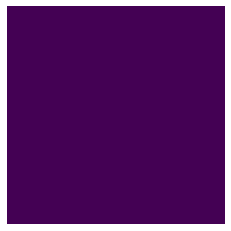

In [65]:
plot_color_image(X_train[0,:,:,0])

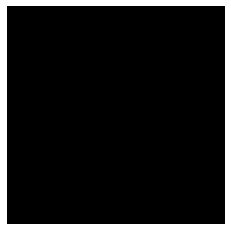

In [66]:
plot_image(X_train[0,:,:,0])

In [67]:
# Image batch generator
def imageGenerator(X, y, batch_size):
    img_rows, img_cols = X.shape[1], X.shape[2]
    resc = 0.02
    rot = 5
    transl = 0.01*img_rows
    while 1: # Infinite loop
        batchX = np.zeros((batch_size, img_rows, img_cols, 1))
        # batch_size random indices over train images
        batch_ids = np.random.choice(X.shape[0], batch_size)
        for j in range(batch_ids.shape[0]): # Loop over random images
            # Rotate around center
            imagej = rotate(X[batch_ids[j]], angle =rot*np.random.randn())
            # Rescale and translate
            tf = SimilarityTransform(scale = 1 + resc*np.random.randn(1,2)[0],
                                translation = transl*np.random.randn(1,2)[0]) 
            batchX[j] = warp(imagej, tf)
        yield (batchX, y[batch_ids])
        

### <font color=CornflowerBlue>CNN (Keras API)<font>

In [68]:
# Learning curve function to visualize accuracy and loss in train and validation set.
def draw_learning_curve(history, keys=['accuracy', 'loss']):
    plt.figure(figsize=(20,8))
    for i, key in enumerate(keys):
        plt.subplot(1, 2, i + 1)
        sns.lineplot(x = history.epoch, y = history.history[key])
        sns.lineplot(x = history.epoch, y = history.history['val_' + key])
        plt.title('Learning Curve')
        plt.ylabel(key.title())
        plt.grid(True)
        #plt.gca().set_ylim(0, 1)
        plt.xlabel('Epoch')
        plt.legend(['train', 'test'], loc='best')
    plt.show()

In [69]:
#CNN Model with one input i.e. preprocessed images.
def generateModel():
    #input layer - note the 1 is because of greyscaling, it would be a 3 if colored images were being used
    input_layer = keras.layers.Input(shape = (img_rows, img_cols, 1))
    
    filterSize = 32
    conv1 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation("relu")(conv1)
    conv1 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(conv1)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation("relu")(conv1)

    maxPool1 = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(conv1)
    
    filterSize = 64
    conv2 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(maxPool1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation("relu")(conv2)
    conv2 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(conv2)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation("relu")(conv2)
    
    maxPool2 = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(conv2)
    
    filterSize = 128
    conv3 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(maxPool2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation("relu")(conv3)
    conv3 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='same')(maxPool2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation("relu")(conv3)
    
    outputStem = keras.layers.AveragePooling2D(pool_size=(3,3), strides=(1,1), padding='same')(conv3)
    outputStem = keras.layers.Flatten()(outputStem)
    
    #Note that the final layer is always dense, and because this is a categorization problem, the activation function is
    #softmax
    outputStem = keras.layers.Dense(nb_classes, activation='softmax')(outputStem)
    
    #This final step is specific to the Keras API method, where the tensor representation is converted to a model
    model = keras.Model(inputs = input_layer, outputs = outputStem)
    return model

In [70]:
model1 = generateModel()
print(model1.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                           

In [71]:
#Reset Log Directory for tensorslow
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint(work_dir+"tmp/my_keras_model.h5", save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(monitor='loss', mode ='min', min_delta=1, patience=10)

In [72]:
learningRate = .001
epochs = 10
n_extension = 10
batchSize = 32
steps_per_epoch = X_train.shape[0]/2
start = timer()

#model 1 with pre processed images
model1.compile(keras.optimizers.Adam(lr=learningRate),metrics=["accuracy"],loss="categorical_crossentropy")
history1 = model1.fit(imageGenerator(X_train, y_train, batchSize), validation_data=(X_val, y_val), epochs= 5, 
                    steps_per_epoch=steps_per_epoch, callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])

#final validation loss and accuracy
final_loss1, final_acc1 = model1.evaluate(X_val, y_val, verbose=1)
end = timer()
#total time taken by model1
elapsed_time1 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model1".format(final_loss1, final_acc1*100))
print("Model 1 with pre processed image training time in seconds", elapsed_time1)

Epoch 1/5
346/346 [==============================] - 444s 1s/step - loss: 4.7168 - accuracy: 0.1793 - val_loss: 4.9196 - val_accuracy: 0.0909
Epoch 2/5
346/346 [==============================] - 377s 1s/step - loss: 3.2360 - accuracy: 0.2945 - val_loss: 4.7208 - val_accuracy: 0.1414
Epoch 3/5
346/346 [==============================] - 348s 1s/step - loss: 3.1560 - accuracy: 0.3130 - val_loss: 6.0586 - val_accuracy: 0.1582
Epoch 4/5
346/346 [==============================] - 368s 1s/step - loss: 3.1234 - accuracy: 0.3219 - val_loss: 5.3806 - val_accuracy: 0.1549
Epoch 5/5
10/10 [==============================] - 2s 209ms/step - loss: 5.2624 - accuracy: 0.1582
Final loss: 5.262435, final accuracy: 15.824915 for model1
Model 1 with pre processed image training time in seconds 0:31:27.544520


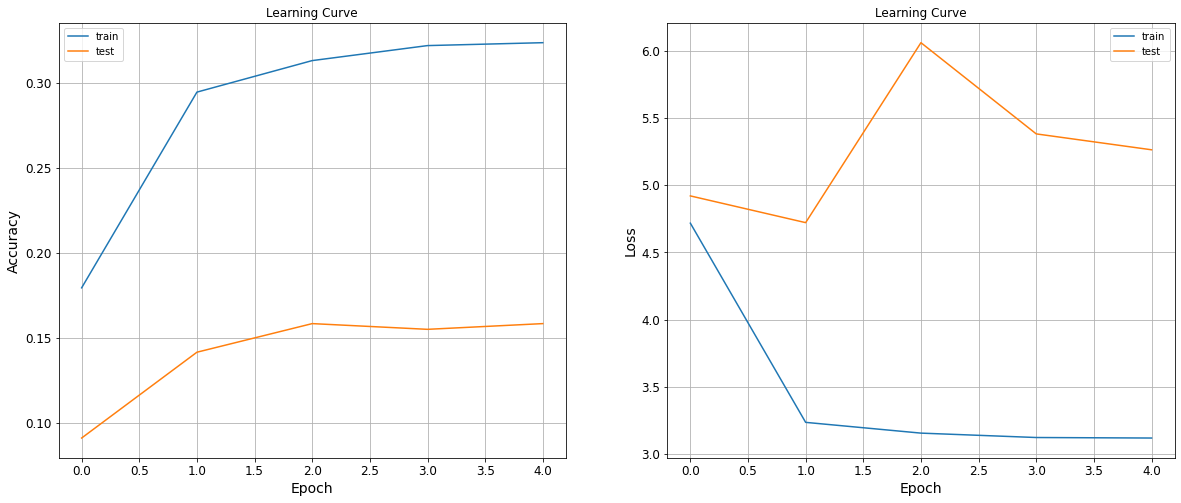

In [73]:
# Visualize learning curve for model 1 with pre processed images.
draw_learning_curve(history1)

Accuracy for train set is higher than test set through each epoch. However, loss is higher for test than train set through each epoch. Train set loss decreases through each epoch. 

In [74]:
#model 1 summarized results
train_loss1, train_acc1 = model1.evaluate(X_train, y_train)
Model1 = "CNN Model 1 (pre-processed features)"
results = pd.DataFrame(columns = ['Model', 'Time', 'Train-loss', 'Train-accuracy', 'Test-loss', 'Test-Accuracy'])
row1 = [Model1, elapsed_time1, train_loss1, train_acc1, final_loss1, final_acc1]
results = results.append(pd.DataFrame([row1], columns=results.columns), ignore_index=True)

22/22 [==============================] - 5s 220ms/step - loss: 3.3996 - accuracy: 0.3377


In [75]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,CNN Model 1 (pre-processed features),0 days 00:31:27.544520,3.399639,0.337662,5.262435,0.158249


In [76]:
# CNN Model with 2 input features combined (preprocessed feature using images and  pre-extracted numerical features)
def generateCombinedModel(learning_rate=0.001):

    Input_layer = keras.layers.Input(shape=(img_rows, img_cols, 1))

    first = keras.layers.Conv2D(64, kernel_size=(3,3), activation= "relu", padding= "same")(Input_layer)

    first = keras.layers.Conv2D(128, kernel_size=(3,3), activation = "relu")(first)

    first = keras.layers.Dropout(.5)(first)

    first = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(first)

    first = keras.layers.Flatten()(first)
    
    #second network only for the pre_extracted features

    Input_layer_features = keras.layers.Input(shape=(192,1),name='second')

    second = keras.layers.Dense(100, activation = "relu")(Input_layer_features)

    second = keras.layers.MaxPool1D()(second)

    second = keras.layers.Flatten()(second)

    combined = keras.layers.concatenate([first,second])
    type(combined)

    combined = keras.layers.Dense(100, activation= "relu")(combined)
    combined = keras.layers.Dropout(.5)(combined)
    #output layer
    output_layer = keras.layers.Dense(99, activation="softmax")(combined)
    optimizer = keras.optimizers.Adam(learning_rate)

    model = keras.Model(inputs=[Input_layer, Input_layer_features],outputs=output_layer)
    #"categorical_crossentropy" loss  as we have converted the labels to categorical. 
    # otherwise use "sparse_categorical_crossentropy" loss if we have sparse labels.
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [77]:
#Initiallize model 2
model2 = generateCombinedModel()
#print model 2 summary
print(model2.summary())

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_14 (Conv2D)             (None, 64, 64, 64)   640         ['input_4[0][0]']                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 62, 62, 128)  73856       ['conv2d_14[0][0]']              
                                                                                                  
 second (InputLayer)            [(None, 192, 1)]     0           []                               
                                                                                            

In [78]:
start = timer()

#model2 with combined features i.e. pre processed images and pre extracted features.
history2 = model2.fit([train_img, features_train], train_target, validation_data=([val_img, features_val], val_target), epochs= 100)
#final validation loss on model 2
final_loss2, final_acc2 = model2.evaluate([val_img, features_val], val_target, verbose=1)

end = timer()
#Total time taken by model 2
elapsed_time2 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model2 with combined feature".format(final_loss2, final_acc2*100))
print("Model 2 with combined feature training time in seconds", elapsed_time2)

Epoch 1/100
25/25 [==============================] - 43s 2s/step - loss: 4.4270 - accuracy: 0.0442 - val_loss: 3.8817 - val_accuracy: 0.2222
Epoch 2/100
25/25 [==============================] - 42s 2s/step - loss: 3.6095 - accuracy: 0.1768 - val_loss: 2.7740 - val_accuracy: 0.4545
Epoch 3/100
25/25 [==============================] - 42s 2s/step - loss: 2.7116 - accuracy: 0.3295 - val_loss: 1.8075 - val_accuracy: 0.6970
Epoch 4/100
25/25 [==============================] - 41s 2s/step - loss: 1.9467 - accuracy: 0.4962 - val_loss: 1.1076 - val_accuracy: 0.8485
Epoch 5/100
25/25 [==============================] - 41s 2s/step - loss: 1.3709 - accuracy: 0.6288 - val_loss: 0.7485 - val_accuracy: 0.9091
Epoch 6/100
25/25 [==============================] - 41s 2s/step - loss: 1.0591 - accuracy: 0.7045 - val_loss: 0.5075 - val_accuracy: 0.9091
Epoch 7/100
25/25 [==============================] - 41s 2s/step - loss: 0.9539 - accuracy: 0.7273 - val_loss: 0.4399 - val_accuracy: 0.9242
Epoch 8/100
2

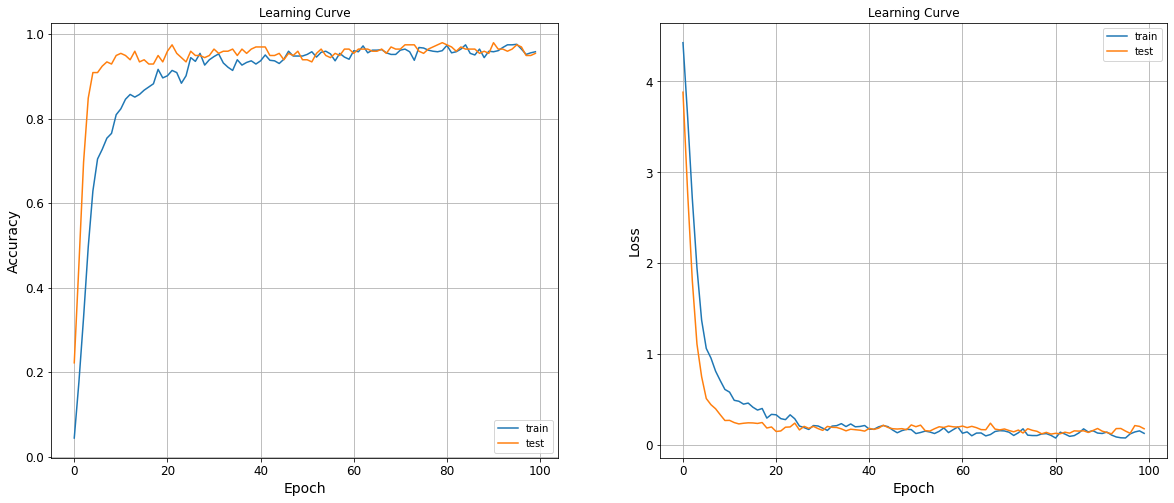

In [79]:
#Visualize learning curve for model 2
draw_learning_curve(history2)

Accuracy starts oscilating around 0.9 for both train and test sets. 100 epochs this time so it would make sense. Same for loss around 0.1

In [80]:
#Summarize Model 2 results
train_loss2, train_acc2 = model2.evaluate([train_img, features_train], train_target)
Model2 = "CNN Model 2 (Combined Features)"
row2 = [Model2, elapsed_time2, train_loss2, train_acc2, final_loss2, final_acc2]
results = results.append(pd.DataFrame([row2], columns=results.columns), ignore_index=True)

25/25 [==============================] - 9s 369ms/step - loss: 4.0971e-04 - accuracy: 1.0000


In [81]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,CNN Model 1 (pre-processed features),0 days 00:31:27.544520,3.399639,0.337662,5.262435,0.158249
1,CNN Model 2 (Combined Features),0 days 01:09:25.501454,0.000410,1.000000,0.174313,0.954545


In [82]:
#intiallize Model 3
model3 = generateCombinedModel()
#Print model summary
print(model3.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 64, 64, 64)   640         ['input_5[0][0]']                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 62, 62, 128)  73856       ['conv2d_16[0][0]']              
                                                                                                  
 second (InputLayer)            [(None, 192, 1)]     0           []                               
                                                                                            

In [83]:
start = timer()

#Data Augmentation using keras image preprocessing library
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    zca_whitening=True,
    fill_mode='nearest')

#fit image data generator
datagen.fit(train_img)

STEP_SIZE_TRAIN=train_img.shape[0]//32
STEP_SIZE_VALID=val_img.shape[0]//16

# fits the model on batches with real-time data augmentation and combined feature set.
history3 = model3.fit(datagen.flow([train_img, features_train], train_target, batch_size=32),
                     steps_per_epoch=STEP_SIZE_TRAIN, 
                     validation_data = ([val_img, features_val], val_target),
                     epochs=30, 
                     callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])
#Final validation loss and accuracy for model 3
final_loss3, final_acc3 = model3.evaluate([val_img, features_val], val_target, verbose=1)
end = timer()
#total time taken for training model3
elapsed_time3 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for Model 3 with combined features and data augmentation".format(final_loss3, final_acc3*100))
print("Model 3 with combined features and data augmentation training time in seconds", elapsed_time3)

Epoch 1/30
24/24 [==============================] - 52s 2s/step - loss: 35.8085 - accuracy: 0.0211 - val_loss: 4.2703 - val_accuracy: 0.0960
Epoch 2/30
24/24 [==============================] - 48s 2s/step - loss: 4.1549 - accuracy: 0.0605 - val_loss: 3.6630 - val_accuracy: 0.1970
Epoch 3/30
24/24 [==============================] - 46s 2s/step - loss: 3.6011 - accuracy: 0.1645 - val_loss: 2.8034 - val_accuracy: 0.4596
Epoch 4/30
24/24 [==============================] - 48s 2s/step - loss: 2.8404 - accuracy: 0.3039 - val_loss: 1.9215 - val_accuracy: 0.6111
Epoch 5/30
24/24 [==============================] - 47s 2s/step - loss: 2.3219 - accuracy: 0.4066 - val_loss: 1.3788 - val_accuracy: 0.7626
Epoch 6/30
24/24 [==============================] - 47s 2s/step - loss: 1.8645 - accuracy: 0.4908 - val_loss: 0.9856 - val_accuracy: 0.8586
Epoch 7/30
24/24 [==============================] - 47s 2s/step - loss: 1.5784 - accuracy: 0.5763 - val_loss: 0.7520 - val_accuracy: 0.8889
Epoch 8/30
24/24 [=

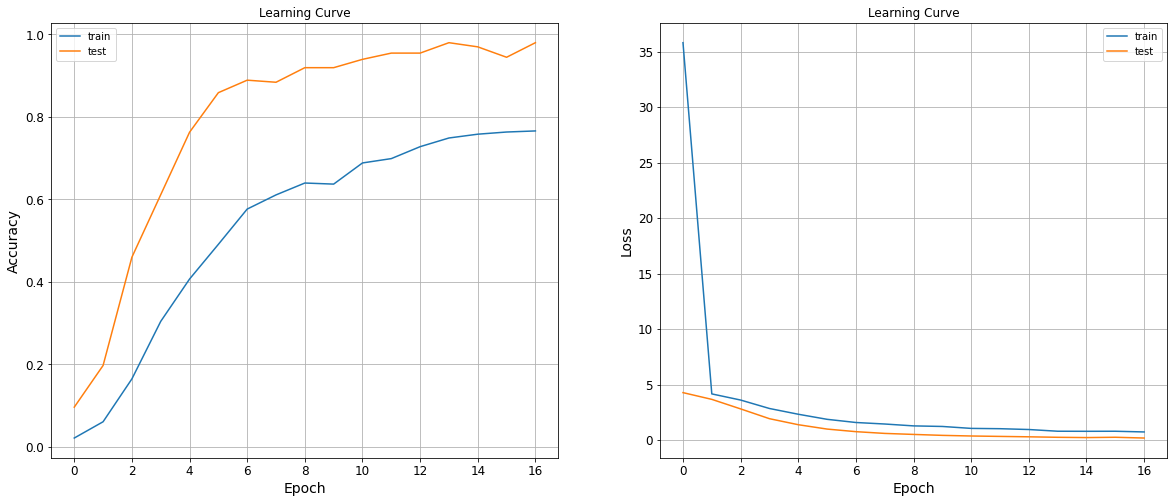

In [84]:
#Visualize learning curve
draw_learning_curve(history3)

Looking at the learning curve, the test set has a higher accuracy through each epoch than the train set. The train set has a higher loss by a margin through each epoch in comparison to the test set 


In [85]:
#Summarize model 3 results
train_loss3, train_acc3 = model3.evaluate([train_img, features_train], train_target)
Model3 = "CNN Model 3 (Combined augmented features)"
row3 = [Model3, elapsed_time3, train_loss3, train_acc3, final_loss3, final_acc3]
results = results.append(pd.DataFrame([row3], columns=results.columns), ignore_index=True)

25/25 [==============================] - 9s 377ms/step - loss: 0.0461 - accuracy: 0.9987


In [86]:
results

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,CNN Model 1 (pre-processed features),0 days 00:31:27.544520,3.399639,0.337662,5.262435,0.158249
1,CNN Model 2 (Combined Features),0 days 01:09:25.501454,0.000410,1.000000,0.174313,0.954545
2,CNN Model 3 (Combined augmented features),0 days 00:17:33.164543,0.046085,0.998737,0.178268,0.979798


In [87]:
# saving the model with less validation loss and more accuracy i.e. model 3 with combined features and data augmentation.
save_dir = "/results/"
model_name = 'keras_leaf_classifier_best.h5'
model_path = os.path.join(save_dir, model_name)
model3.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_leaf_classifier_best.h5 


In [88]:
# predict the labels using model 3 with combined features and data augmentation.
y_pred = model3.predict([val_img, features_val])
y_pred.round(2)

array([[0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [89]:
yPred = pd.DataFrame(y_pred, columns=le.classes_)

In [90]:
yPred

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,1.639271e-09,4.324890e-09,9.973460e-01,1.698332e-05,9.899771e-09,7.499952e-06,6.922546e-07,6.624437e-08,3.937437e-09,1.552242e-08,...,2.299195e-06,2.568516e-06,2.705732e-11,1.210841e-09,1.208152e-11,2.590366e-07,2.057193e-06,0.000140,6.008478e-09,6.815575e-10
1,1.292326e-06,9.662003e-04,6.061193e-03,4.479080e-06,1.307818e-04,8.420018e-04,2.100119e-05,1.156556e-04,1.773871e-05,1.879918e-06,...,8.318933e-05,1.472350e-05,8.670868e-06,1.650948e-06,6.659886e-06,1.096645e-04,1.065419e-04,0.000160,1.069793e-04,6.602821e-05
2,5.425808e-08,4.493970e-07,1.260788e-02,1.022775e-02,8.064379e-06,4.069842e-05,4.573187e-06,7.567154e-04,2.635859e-07,2.284267e-08,...,7.531757e-05,4.522862e-04,2.018061e-10,1.618952e-06,2.036379e-11,8.357099e-04,1.303299e-05,0.000002,9.012832e-08,2.567004e-06
3,2.363108e-11,9.906635e-12,5.041918e-05,2.220361e-08,4.019855e-13,3.908751e-08,8.717279e-09,2.336025e-09,3.671178e-14,8.151996e-11,...,2.012793e-12,4.554442e-09,1.571989e-10,6.285099e-09,1.756093e-11,1.692768e-08,8.471858e-10,0.000018,1.358183e-13,9.122680e-08
4,6.250920e-08,1.543173e-08,1.370129e-07,1.040106e-05,2.427466e-06,3.328168e-05,2.017411e-02,8.837302e-07,3.914915e-07,2.983417e-06,...,1.347071e-08,1.917926e-08,1.193813e-06,3.237655e-05,1.550425e-05,1.163014e-06,5.354658e-07,0.001888,1.137267e-06,7.938905e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,3.107352e-05,1.212809e-08,6.296485e-05,7.283317e-10,1.449386e-06,3.954424e-05,5.511230e-09,1.859205e-06,1.340225e-06,2.917034e-08,...,1.884274e-07,6.766916e-05,1.784546e-08,1.016238e-03,1.425861e-03,4.969428e-07,2.946402e-08,0.000002,5.919747e-10,3.743088e-09
194,1.911065e-12,1.113039e-07,4.466636e-02,1.572681e-07,3.801975e-09,1.528821e-08,6.105598e-07,1.506685e-08,3.003729e-09,2.031064e-09,...,7.892239e-07,1.081651e-05,2.617415e-10,1.552259e-10,2.223265e-11,3.673599e-08,2.538894e-07,0.000640,1.678931e-06,2.020384e-10
195,7.710652e-08,7.109038e-08,2.839913e-07,2.953299e-05,2.073751e-06,7.860640e-06,2.222098e-03,1.132142e-05,5.547528e-06,9.671109e-07,...,5.172781e-07,2.841026e-07,3.060053e-06,7.812544e-05,1.840681e-05,1.261356e-05,1.976457e-05,0.001167,2.511423e-07,4.309977e-05
196,5.204957e-09,7.753018e-07,2.553672e-05,3.596426e-05,1.735830e-06,5.781416e-06,4.062958e-06,1.488643e-06,2.753313e-05,4.274084e-07,...,3.874499e-06,1.619287e-05,6.179380e-08,3.470926e-06,8.833998e-11,3.354872e-03,6.864417e-06,0.000017,2.407277e-07,1.578554e-05


In [91]:
# Evaluate model accuracy, loss and error for model 3.
score = model3.evaluate([val_img, features_val], val_target)
print('Test loss: {}%'.format(score[0] * 100))
print('Test score: {}%'.format(score[1] * 100))

print("MLP Error: %.2f%%" % (100 - score[1] * 100))

7/7 [==============================] - 2s 326ms/step - loss: 0.1783 - accuracy: 0.9798
Test loss: 17.826752364635468%
Test score: 97.97979593276978%
MLP Error: 2.02%


In [92]:
#model summary sorted by validation loss.
results.set_index("Model", drop = True, inplace = True)
results.sort_values(by=['Test-loss'], ascending= True)

,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
Model,,,,,
CNN Model 2 (Combined Features),0 days 01:09:25.501454,0.000410,1.000000,0.174313,0.954545
CNN Model 3 (Combined augmented features),0 days 00:17:33.164543,0.046085,0.998737,0.178268,0.979798
CNN Model 1 (pre-processed features),0 days 00:31:27.544520,3.399639,0.337662,5.262435,0.158249


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

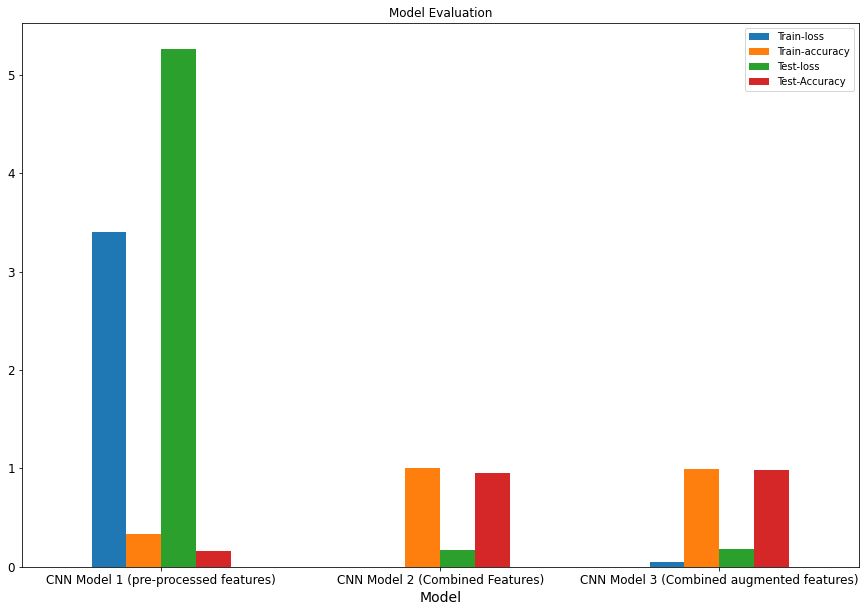

In [93]:
#visualize model results based on test and train loss and accuracy
results[['Train-loss','Train-accuracy', 'Test-loss', 'Test-Accuracy']].plot(kind='bar', title ="Model Evaluation", figsize=(15, 10))
plt.xticks(rotation='horizontal')

#### Submission (Evaluate the model on test set) for Kaggle

In [94]:
#Ids to act as an index for submission dataframe
testIds = df_test.pop('id')
# standardize the data by setting the mean to 0 and std to 1
features_test = StandardScaler().fit(df_test).transform(df_test)

In [95]:
print('Test predictions...')
#model 3 prediction
preds = model3.predict([test_images,features_test])

# dataframe based on id as index and different species as columns which can be read from labelencoder classes.
submission = pd.DataFrame(preds,index=testIds,columns=le.classes_)

#save submission results to csv
submission.to_csv('Leaf_Keras_CNN_imagegen.csv')

Test predictions...


In [96]:
print('Test Model 1 predictions...')
#model 1 prediction
preds = model1.predict(test_images)
# dataframe based on id as index and different species as columns which can be read from labelencoder classes.
submission = pd.DataFrame(preds,index=testIds,columns=le.classes_)
#save submission results to csv
submission.to_csv('Leaf_Keras_CNN_preextracted_features.csv')

Test Model 1 predictions...


In [97]:
print('Test Model 2 predictions...')
#model 2 prediction
preds = model2.predict([test_images,features_test])
# dataframe based on id as index and different species as columns which can be read from labelencoder classes.
submission = pd.DataFrame(preds,index=testIds,columns=le.classes_)
#save submission results to csv
submission.to_csv('Leaf_Keras_CNN_combined_features.csv')

Test Model 2 predictions...


In [98]:
###### test out additional architectures/changing parameters.

In [110]:
#CNN Model with one input i.e. preprocessed images.
def generateModel4():
    #input layer - note the 1 is because of greyscaling, it would be a 3 if colored images were being used
    input_layer = keras.layers.Input(shape = (img_rows, img_cols, 1))
    
    filterSize = 32
    conv1 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='valid')(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation("relu")(conv1)
    conv1 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='valid')(conv1)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation("relu")(conv1)

    maxPool1 = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid')(conv1)

    filterSize = 32
    conv2 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='valid')(maxPool1)
    conv2 = keras.layers.BatchNormalization()(conv1)
    conv2 = keras.layers.Activation("relu")(conv1)
    conv2 = keras.layers.Conv2D(filterSize, (3,3), strides=(1,1), padding='valid')(conv2)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation("relu")(conv2)

    maxPool2 = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid')(conv2)
    
    filterSize = 64
    conv3 = keras.layers.Conv2D(filterSize, (5,5), strides=(1,1), padding='valid')(maxPool2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation("relu")(conv3)
    conv3 = keras.layers.Conv2D(filterSize, (5,5), strides=(1,1), padding='valid')(conv3)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation("relu")(conv3)
    
    maxPool3 = keras.layers.MaxPooling2D(pool_size=(5,5), strides=(2,2), padding='valid')(conv3)
    
    filterSize = 128
    conv4 = keras.layers.Conv2D(filterSize, (7,7), strides=(1,1), padding='valid')(maxPool3)
    conv4 = keras.layers.BatchNormalization()(conv3)
    conv4 = keras.layers.Activation("relu")(conv3)
    conv4 = keras.layers.Conv2D(filterSize, (7,7), strides=(1,1), padding='valid')(maxPool3)
    conv4 = keras.layers.BatchNormalization()(conv3)
    conv4 = keras.layers.Activation("relu")(conv3)
    
    outputStem = keras.layers.AveragePooling2D(pool_size=(7,7), strides=(1,1), padding='valid')(conv4)
    outputStem = keras.layers.Flatten()(outputStem)
    
    #Note that the final layer is always dense, and because this is a categorization problem, the activation function is
    #softmax
    outputStem = keras.layers.Dense(nb_classes, activation='softmax')(outputStem)
    
    #This final step is specific to the Keras API method, where the tensor representation is converted to a model
    model = keras.Model(inputs = input_layer, outputs = outputStem)
    return model

In [111]:
model4 = generateModel4()
print(model4.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 62, 62, 32)       128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 60, 60, 32)       128       
 chNormalization)                                          

In [113]:
#Reset Log Directory for tensorslow
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint(work_dir+"tmp/my_keras_model.h6", save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(monitor='loss', mode ='min', min_delta=1, patience=10)

In [117]:
learningRate = .001
epochs = 10
n_extension = 10
batchSize = 32
steps_per_epoch = X_train.shape[0]/2
start = timer()

#model 4 with pre processed images
model4.compile(keras.optimizers.Adam(lr=learningRate),metrics=["accuracy"],loss="categorical_crossentropy")
history4 = model4.fit(imageGenerator(X_train, y_train, batchSize), validation_data=(X_val, y_val), epochs= 5, 
                    steps_per_epoch=steps_per_epoch, callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])

#final validation loss and accuracy
final_loss4, final_acc4= model4.evaluate(X_val, y_val, verbose=1)
end = timer()
#total time taken by model1
elapsed_time4 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model4".format(final_loss4, final_acc4*100))
print("Model 4 with pre processed image training time in seconds", elapsed_time4)

Epoch 1/5
346/346 [==============================] - 402s 1s/step - loss: 4.0177 - accuracy: 0.1528 - val_loss: 4.3786 - val_accuracy: 0.0741
Epoch 2/5
346/346 [==============================] - 372s 1s/step - loss: 3.3726 - accuracy: 0.2595 - val_loss: 5.0428 - val_accuracy: 0.1279
Epoch 3/5
346/346 [==============================] - 369s 1s/step - loss: 3.2590 - accuracy: 0.2876 - val_loss: 5.8853 - val_accuracy: 0.1313
Epoch 4/5
346/346 [==============================] - 371s 1s/step - loss: 3.1620 - accuracy: 0.3101 - val_loss: 5.2817 - val_accuracy: 0.1717
Epoch 5/5
10/10 [==============================] - 2s 222ms/step - loss: 5.6330 - accuracy: 0.1549
Final loss: 5.633009, final accuracy: 15.488215 for model4
Model 4 with pre processed image training time in seconds 0:31:25.849646


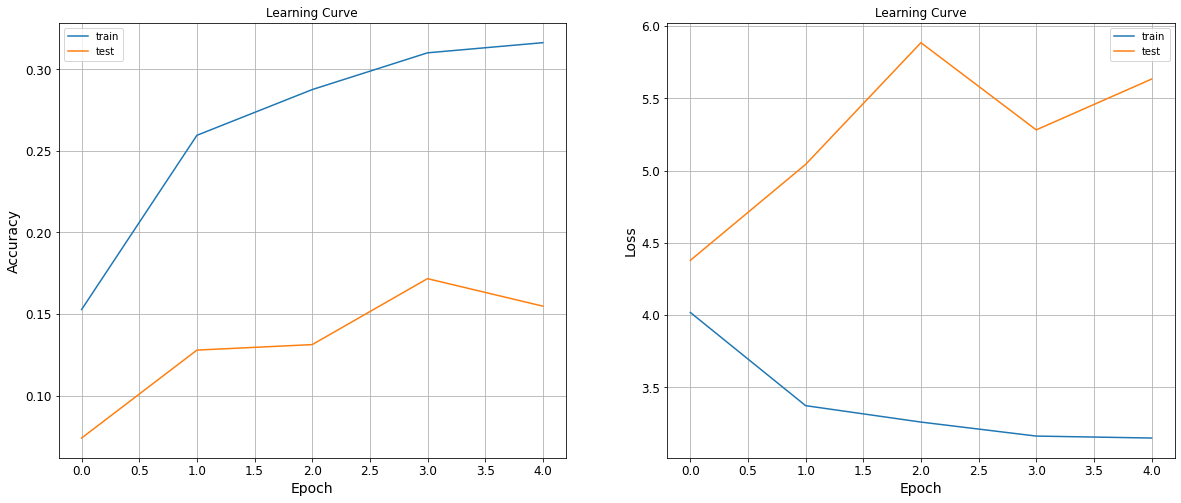

In [118]:
# Visualize learning curve for model 4 with pre processed images.
draw_learning_curve(history4)


Through each Epoch, the train set has a higher accuracy and lower loss in comparison to the test set. 

In [119]:

#model 4 summarized results
train_loss4, train_acc4 = model4.evaluate(X_train, y_train)
Model4 = "CNN Model 4"
results = pd.DataFrame(columns = ['Model', 'Time', 'Train-loss', 'Train-accuracy', 'Test-loss', 'Test-Accuracy'])
row4 = [Model4, elapsed_time4, train_loss4, train_acc4, final_loss4, final_acc4]
results = results.append(pd.DataFrame([row4], columns=results.columns), ignore_index=True)

22/22 [==============================] - 5s 234ms/step - loss: 3.5786 - accuracy: 0.3319


In [120]:
results
    

,Model,Time,Train-loss,Train-accuracy,Test-loss,Test-Accuracy
0,CNN Model 4,0 days 00:31:25.849646,3.578607,0.33189,5.633009,0.154882




#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 
Image classification is a beneficial aspect of digital image analysis. As a website provider, image classification using neural networks would be a beneficial tool to assist in automatically labeling images provided by the end user.  The classification of images of leaf specimens using convolutional neural networks (CNNs) involving keras/tensor flow will give insight on the effectiveness of the neural network in image classification. Using binary leaf images and extracted features (shape, margin, and texture), the goal is to identify 99 species of plants accurately. As plants have differentiating characteristics, as will the images provided by the end user, the application of different techniques involving image-based features and the tweaking of parameters and architecture of CNN models to achieve the highest accuracy, will demonstrate/ give some insight on the effectiveness of the network on helping solve our end goal, labeling images provided by end users. 


(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

The dataset contained approximately 1,584 images of leaf specimens, in which there are 16 samples of 99 species. The images were converted into binary black leaves with the backgrounds being white (Black and white images).  The training set has 990 samples and for each sample, there is a binary image of the leaf of variable size and d-dimensional feature vectors (d = 192). 
 
Research Design: 
 
Analyze dataset (summary statistics, data types, Check for missing values 
Inspect Class balances for train set,etc.)
Train and test were split 70/30
Create CNN models and test for highest Accuracy
(Building a classifier using pre-extracted features/ creating a set with own features)
Compare CNN models through accuracy metric and loss for train and test
Examine errors 
 
 
Traditional exploratory analysis was employed as a pie chart was created to see the distribution of label variable of interest. In addition, the images were also visualized to see different orientation.  Models were built in which model 1 was using pre-processed features (1 input). Model 2 used a combination of features (pre-processed images and pre-extracted features). Model 3 involved data augmentation using keras image preprocessing library. Model 3 was fit on batches with real-time data augmentation and combined features. Model 4 was a different architecture of model 1, to demonstrate the loss and accuracy difference with a different structure.  Each model had its own uniqueness.  ReLU function was applied to increase non-linearity. Models were trained through multiple epochs until a well-defined neural network was produced. 
 
Metrics used were mainly accuracy and loss. A low accuracy and huge loss means there are huge errors on a lot of data. Low accuracy, low loss means there are little errors in a lot of the data. Good accuracy but low loss corresponds to low errors on a few data (good case). Whether loss is high or low is subjective as it depends on the data and problem. For the loss metric, categorical_crossentropy was used as the labels were converted to categorical. The multilayer perceptron error was taken to evaluate the error of models. 

 


(3) Overview of programming work; 
Most of the programming revolved around creating models, tweaking hyper parameters, data augmentation. In the beginning, there was some traditional coding work such as: Labels were encoded to categorical as they were textual, stratified random folds were set for cross validation. Data was reshaped so we have a single channel. Functions were defined, such as the image batch generator, learning curves, and individual models. 

(4) Review of results with recommendations for management.
CNN networks do take some time to run, however, there are some benefits to this network as it can automatically detect important features without human supervision. As evident in the leaf detection, Model 1 took approximately 31 minutes, model 2 took an hour, and model 3 took 17 minutes to run. Amongst all 4 models that were evaluated, CNN model did the best with the highest test accuracy, and a slightly higher loss than model 2. Model 3 had an MLP of 2.02% which isn’t that high. CNNs are ideal for processing 2D images as it uses 2D convolutional layers. In comparison to other classification algorithms, CNNs use very little pre-processing. Hence, I would recommend using the combined augmented feature network when using the convolutional neural network to identify and label images provided by end users. With a  test – accuracy of 98% and low loss, demonstrates the minimum errors made by the model. 
 
